# Movie Recommender System

Using the MovieLens 100K Dataset 

**Load Dataset**

Set the min_rating parameter to be anything between 0.0 to 5.0 to include only those reviews with a set minimum rating. The rest of the parameters are set to default. 

In [1]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
# Fetching data using fetch_movielens method
movielens_data = fetch_movielens(min_rating = 3.0)

C:\Users\Paula\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
# See what the movielens_data variable contains
for key, value in movielens_data.items():
    print(key, type(value), value.shape)

train <class 'scipy.sparse.coo.coo_matrix'> (943, 1682)
test <class 'scipy.sparse.coo.coo_matrix'> (943, 1682)
item_features <class 'scipy.sparse.csr.csr_matrix'> (1682, 1682)
item_feature_labels <class 'numpy.ndarray'> (1682,)
item_labels <class 'numpy.ndarray'> (1682,)


train – Contains training set interactions.

test – Contains testing set interactions.

item_features  – Contains item features.

item_feature_labels  – Labels of item features.

item_labels  – Items’ titles.

In [3]:
train = movielens_data['train']
labels = movielens_data['item_labels']

(0.0, 100.0)

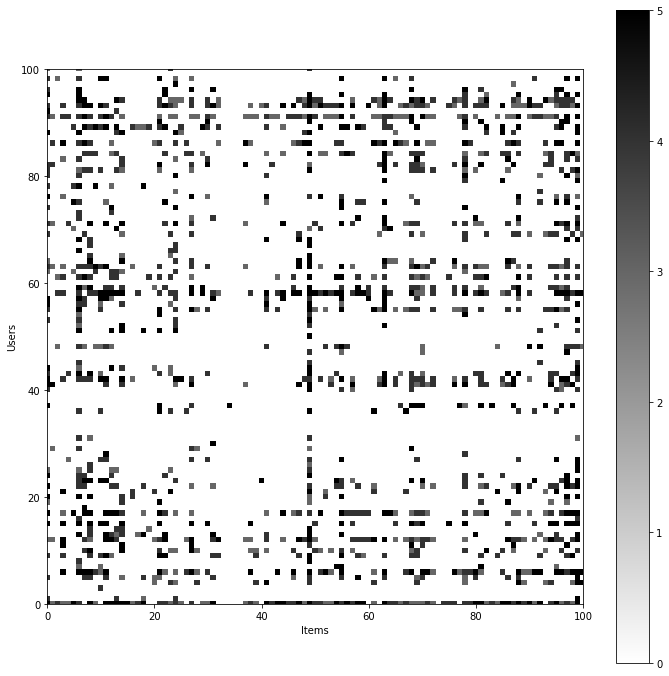

In [4]:
import matplotlib.pylab as plt
# Visualize the MovieLense data matrix of the 
# first 100 rows and 100 columns in form of a heatmap
plt.figure(figsize=(12,12))
d = train.todense()
plt.imshow(d, interpolation='none', cmap='binary')
plt.colorbar()
plt.xlabel('Items')
plt.ylabel('Users')
plt.xlim(0,100)
plt.ylim(0,100)
# Only ratings beyond 3.0 will be shown

**Build Model**

Specify the the learning schedule, learning rate and loss paramter, and use one of the 4 loss functions WARP. The rest of the parameters are set to default.

In [5]:
# Building the model 
model = LightFM(learning_schedule ='adagrad', learning_rate = 0.1, loss = 'warp')

# Training the model
model.fit(train, epochs = 30, num_threads = 2)

In [6]:
# Number of users and movies in training data
n_users, n_items = movielens_data['train'].shape
print("n_users: " + str(n_users))
print("n_items: " + str(n_items))

n_users: 943
n_items: 1682


**Prediction**

In [7]:
# Randomly selecting a user (i.e. user_id) 
user_id = 118

In [8]:
# List of movies user 118 has already liked
already_liked = labels[train.tocsr()[user_id].indices]

print("\nMovies already liked by User %s:" % user_id)
for x in already_liked:
  print("    %s" % x)


Movies already liked by User 118:
    Twelve Monkeys (1995)
    Dead Man Walking (1995)
    Seven (Se7en) (1995)
    Usual Suspects, The (1995)
    Braveheart (1995)
    Taxi Driver (1976)
    Rumble in the Bronx (1995)
    Birdcage, The (1996)
    Apollo 13 (1995)
    Crimson Tide (1995)
    To Wong Foo, Thanks for Everything! Julie Newmar (1995)
    Star Wars (1977)
    Madness of King George, The (1994)
    Outbreak (1995)
    Pulp Fiction (1994)
    Shawshank Redemption, The (1994)
    Four Weddings and a Funeral (1994)
    Much Ado About Nothing (1993)
    Remains of the Day, The (1993)
    Searching for Bobby Fischer (1993)
    Blade Runner (1982)
    Welcome to the Dollhouse (1995)
    Terminator 2: Judgment Day (1991)
    Fargo (1996)
    Mystery Science Theater 3000: The Movie (1996)
    Truth About Cats & Dogs, The (1996)
    Rock, The (1996)
    Independence Day (ID4) (1996)
    Lone Star (1996)
    Phenomenon (1996)
    Wizard of Oz, The (1939)
    Big Night (1996)
    Die

In [9]:
# Create a variable item_ids, an array to list all the numbers to mark an ID for every movie
import numpy as np
# Movies our model predicts they will like:
item_ids = np.arange(n_items)
print(item_ids)

[   0    1    2 ... 1679 1680 1681]


In [10]:
# Create another variable, scores which is a single dimension arrays of scores 
# that will predict the preference score for each movie for that particular user.
scores = model.predict(user_id, item_ids)

# Printing the scores
print(scores)

[ -8.712564 -10.557685 -10.940129 ... -14.447687 -13.938691 -13.316074]


In [11]:
# Rank them in order of most liked to least:
sorted_ids = np.argsort(-scores) # Using negative sign to sort in order of most liked first

top_items = movielens_data['item_labels'][sorted_ids]

# Printing the top_items
print(top_items)

['Rock, The (1996)' 'Independence Day (ID4) (1996)' 'Contact (1997)' ...
 'Madame Butterfly (1995)' 'Foreign Correspondent (1940)' 'Top Hat (1935)']


In [12]:
print("Top 5 movies to be recommended to user " + str(user_id) + " are:\n")

for movie in range(5):
    print(str(movie+1) + ". " + top_items[movie])

Top 5 movies to be recommended to user 118 are:

1. Rock, The (1996)
2. Independence Day (ID4) (1996)
3. Contact (1997)
4. Star Trek: First Contact (1996)
5. Mission: Impossible (1996)
